In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
import utils
from sklearn.mixture import GaussianMixture as GMM
from scipy.spatial.distance import cdist
import seaborn as sns; sns.set()
import numpy as np
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal as mvn
from plotnine import *

%matplotlib inline

In [ ]:
df = pd.read_csv("kmeans1.csv")

In [ ]:
df.head(10)

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
5,-1.042526,-3.125350
6,-2.009227,-2.072902
7,-1.635156,-0.177113
8,-1.333048,-1.081251
9,-1.315932,-3.712421


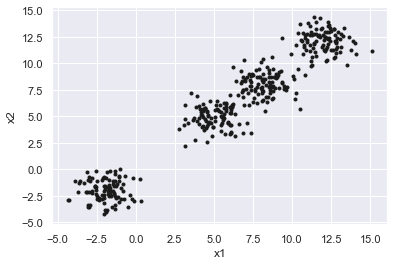

In [ ]:
plt.plot(df['A'],df['B'],'k.')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [ ]:
# posee 3 clusters

D:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


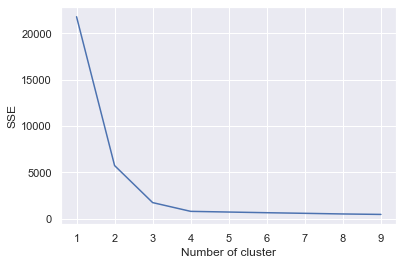

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(df)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Segun criterio del codo, el valor optimo de clusters es K = 3

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)

KMeans(n_clusters=3)

In [ ]:
k_means.cluster_centers_

array([[-1.92438992, -1.96702231],
       [ 6.52291892,  6.40975156],
       [11.80566582, 11.92721128]])

In [ ]:
k_means.inertia_

1733.8031989481492

In [ ]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [ ]:
df['clase'] = k_means.labels_

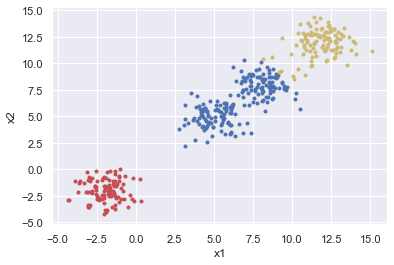

In [ ]:
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(df['A'][df['clase']==i],df['B'][df['clase']==i],colores[i])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

# KMEANS2.CSV

In [ ]:
df2 = pd.read_csv('kmeans2.csv' , index_col = 0)

In [ ]:
df2.head(10)

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
5,0.09250,0.000000,1,0.286667,0.0525,0.000004,20.114943,17.674943,0.002604,0.0285,0.423333,0.008461,3.101105
6,0.07325,0.000035,13,0.270270,0.0530,-0.000171,0.935620,13.223068,0.002724,0.0220,0.405405,0.008623,147.996247
7,0.22200,0.039383,1,0.297872,-0.0335,-0.000061,4.828199,15.904539,0.007964,0.0900,0.276596,0.016653,0.558561
8,0.06300,0.052098,3,0.310680,0.0175,-0.000054,0.088183,12.543311,0.002687,0.0220,0.281553,0.005982,47.769788
9,0.02000,0.012595,4,0.283333,0.0040,-0.000014,0.409165,12.904140,0.000805,0.0065,0.503333,0.003294,1394.064620


In [ ]:
df2.describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


In [ ]:
df2.cov()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Amplitude,0.021873,-7.656020e-03,0.102322,0.000787,0.001169,1.438991e-06,0.323046,0.114288,7.885986e-04,0.008624,-0.002807,2.071538e-03,-9.906738
AndersonDarling,-0.007656,4.114344e-02,-0.222708,0.000158,-0.001927,-3.604871e-07,-0.171910,-0.068317,-2.668473e-04,-0.002857,-0.000665,-7.698128e-04,0.597061
Autocor_length,0.102322,-2.227081e-01,37.468633,0.054849,-0.013438,1.634551e-05,-3.343109,-2.821423,5.942695e-03,0.053050,-0.138680,1.104005e-02,797.721311
Beyond1Std,0.000787,1.581376e-04,0.054849,0.003651,-0.003295,-1.908614e-06,-0.031984,-0.016512,5.934227e-05,0.001142,-0.006023,-2.582216e-05,-0.707231
Gskew,0.001169,-1.926988e-03,-0.013438,-0.003295,0.015948,9.796217e-06,0.170894,0.051464,-1.265465e-05,-0.000600,0.005401,2.307651e-04,-3.582630
LinearTrend,0.000001,-3.604871e-07,0.000016,-0.000002,0.000010,4.680414e-07,0.000700,0.000056,-6.627387e-08,-0.000002,0.000004,1.952483e-07,-0.010113
MaxSlope,0.323046,-1.719101e-01,-3.343109,-0.031984,0.170894,7.003957e-04,88.806510,5.779555,8.031956e-03,0.098450,0.070713,2.992483e-02,-477.132677
Mean,0.114288,-6.831693e-02,-2.821423,-0.016512,0.051464,5.647148e-05,5.779555,3.571989,2.464035e-03,0.034980,0.037282,9.770767e-03,-234.540434
Meanvariance,0.000789,-2.668473e-04,0.005943,0.000059,-0.000013,-6.627387e-08,0.008032,0.002464,3.055287e-05,0.000334,-0.000164,7.498808e-05,-0.280502
MedianAbsDev,0.008624,-2.856669e-03,0.053050,0.001142,-0.000600,-1.710227e-06,0.098450,0.034980,3.343614e-04,0.003922,-0.002671,7.785662e-04,-3.812432


In [ ]:
df2.std()

Amplitude             0.147896
AndersonDarling       0.202838
Autocor_length        6.121163
Beyond1Std            0.060427
Gskew                 0.126287
LinearTrend           0.000684
MaxSlope              9.423721
Mean                  1.889971
Meanvariance          0.005527
MedianAbsDev          0.062624
MedianBRP             0.122715
PercentAmplitude      0.014490
PeriodLS            944.665723
dtype: float64

In [ ]:
df2.dtypes

Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [ ]:
df2.isnull().sum()

Amplitude           0
AndersonDarling     0
Autocor_length      0
Beyond1Std          0
Gskew               0
LinearTrend         0
MaxSlope            0
Mean                0
Meanvariance        0
MedianAbsDev        0
MedianBRP           0
PercentAmplitude    0
PeriodLS            0
dtype: int64

In [ ]:
X1 = df2.iloc[0:14]
X1

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
5,0.09250,0.000000,1,0.286667,0.0525,0.000004,20.114943,17.674943,0.002604,0.0285,0.423333,0.008461,3.101105
6,0.07325,0.000035,13,0.270270,0.0530,-0.000171,0.935620,13.223068,0.002724,0.0220,0.405405,0.008623,147.996247
7,0.22200,0.039383,1,0.297872,-0.0335,-0.000061,4.828199,15.904539,0.007964,0.0900,0.276596,0.016653,0.558561
8,0.06300,0.052098,3,0.310680,0.0175,-0.000054,0.088183,12.543311,0.002687,0.0220,0.281553,0.005982,47.769788
9,0.02000,0.012595,4,0.283333,0.0040,-0.000014,0.409165,12.904140,0.000805,0.0065,0.503333,0.003294,1394.064620


In [ ]:
X1

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
5,0.09250,0.000000,1,0.286667,0.0525,0.000004,20.114943,17.674943,0.002604,0.0285,0.423333,0.008461,3.101105
6,0.07325,0.000035,13,0.270270,0.0530,-0.000171,0.935620,13.223068,0.002724,0.0220,0.405405,0.008623,147.996247
7,0.22200,0.039383,1,0.297872,-0.0335,-0.000061,4.828199,15.904539,0.007964,0.0900,0.276596,0.016653,0.558561
8,0.06300,0.052098,3,0.310680,0.0175,-0.000054,0.088183,12.543311,0.002687,0.0220,0.281553,0.005982,47.769788
9,0.02000,0.012595,4,0.283333,0.0040,-0.000014,0.409165,12.904140,0.000805,0.0065,0.503333,0.003294,1394.064620


In [ ]:
norm = StandardScaler()

In [ ]:
x_std = norm.fit_transform(X1)

In [ ]:
x_std.shape

(14, 13)

In [ ]:
pca = PCA(n_components=2)

X_transformada = pca.fit_transform(x_std)

X_transformada = pd.DataFrame(X_transformada, columns = ['C1', 'C2'])

In [ ]:
X_transformada.head(20)

,C1,C2
0,-2.325004,-0.219050
1,2.581535,-1.305667
2,0.541573,2.442047
3,4.535130,-1.525993
4,-2.553851,-0.243544
5,-0.874483,1.521181
6,-0.589146,-2.084071
7,1.415720,0.299625
8,-0.935345,-1.124551
9,-2.869984,-1.856931


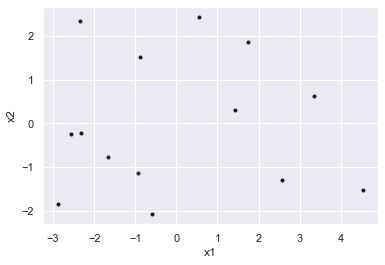

In [ ]:
plt.plot(X_transformada['C1'],X_transformada['C2'],'k.')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

D:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


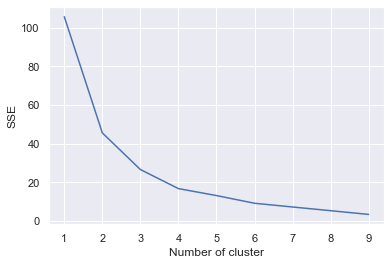

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_transformada)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_transformada)

KMeans(n_clusters=3)

In [ ]:
k_means.cluster_centers_

array([[-1.82180629, -1.04897066],
       [ 2.96825506, -0.47384708],
       [-0.23554563,  2.04730307]])

In [ ]:
# los centroides indican "donde se genera el cluster" el primer "objeto" (-1.82180629, -1.04897066), indica que en ese coordenada
# se genera el cluster donde la distancia entre los datos cercanos de ese cluster es "optima" y así con los otros dos cluster generados.

In [ ]:
k_means.inertia_

26.03853580969161

In [ ]:
k_means.labels_

array([0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0])

In [ ]:
X_transformada['clase'] = k_means.labels_

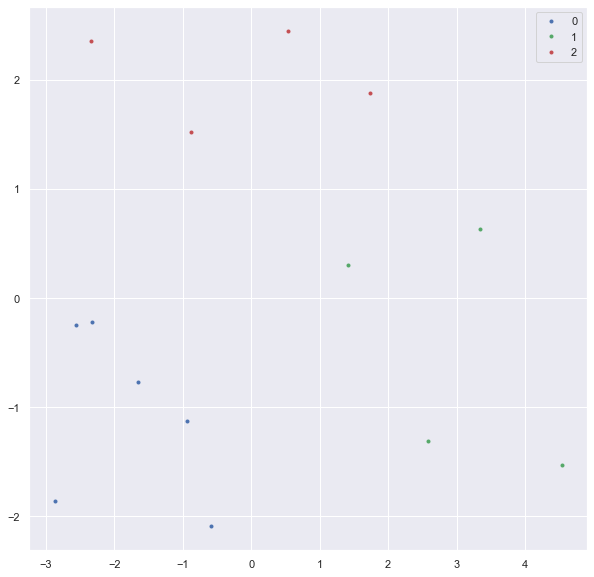

In [ ]:
plt.figure(figsize=(10,10))
colores = ['b.', 'g.', 'r.']
for i in range(0,3):
    plt.plot(X_transformada['C1'][X_transformada['clase']==i],
             X_transformada['C2'][X_transformada['clase']==i], colores[i], label=i)
plt.legend()
plt.show()

In [ ]:
ac = AC(n_clusters=None,
        affinity='euclidean',
        linkage = 'complete',
        distance_threshold=0.0)

In [ ]:
ac.fit(X_transformada)

AgglomerativeClustering(distance_threshold=0.0, linkage='complete',
                        n_clusters=None)

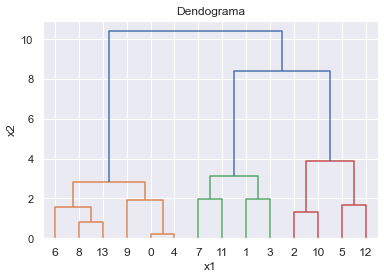

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_transformada, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# Número de clusters según dendograma = 3

# GMM

In [ ]:
z1 = StandardScaler()
X11 = z1.fit_transform(X1)
EM = GMM(n_components = 3)
EM.fit(X1)
cluster = EM.predict(X1)

In [ ]:
cluster

array([0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

D:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


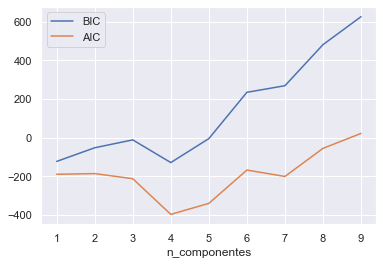

In [ ]:
n_componentes = np.arange(1,10)
modelos = [GMM(n, covariance_type = 'full', random_state = 0).fit(X1)
           for n in n_componentes]
plt.plot(n_componentes, [m.bic(X1) for m in modelos], label = 'BIC')
plt.plot(n_componentes, [m.aic(X1) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('n_componentes')
plt.show()

# matriz de covarianza con n = 3

In [ ]:
centers = np.zeros(shape=(EM.n_components, X1.shape[1]))

for i in range(EM.n_components):

    density = mvn(cov = EM.covariances_[i], mean = EM.means_[i]).pdf(X1)
    print('---------------------')
    print('Gaussiana '+str(i))
    print('Medias')
    print(EM.means_[i])
    print('Covarianza')
    print(EM.covariances_[i])


---------------------
Gaussiana 0
Medias
[ 1.34613636e-01  5.41320000e-02  3.00000000e+00  3.10200909e-01
  3.32272727e-02 -1.60000000e-05  6.80753782e+00  1.60222984e+01
  4.32727273e-03  5.07727273e-02  3.69071182e-01  1.23775455e-02
  8.93649800e+00]
Covarianza
[[ 1.06918564e-02 -3.70987066e-03  7.92727273e-02  3.48603533e-04
   2.02926963e-03 -3.18986364e-06  2.88228118e-01  1.55115087e-01
   3.24909946e-04  4.13732128e-03 -3.70339111e-03  8.87551506e-04
  -7.09729023e-01]
 [-3.70987066e-03  1.00731095e-02 -9.41898182e-02 -4.49564073e-04
  -1.17867568e-03  4.11874782e-06 -3.25508434e-01  2.18626326e-02
  -1.22732501e-04 -1.57793591e-03  1.20088695e-03 -3.83309552e-04
  -1.02602042e-01]
 [ 7.92727273e-02 -9.41898182e-02  2.30909101e+01  5.22824545e-02
   1.34818182e-01  2.22727273e-05 -1.34353447e+01 -4.78295527e+00
   5.44136364e-03  5.53181818e-02 -1.90510727e-01  1.89550000e-02
  -2.89224018e+00]
 [ 3.48603533e-04 -4.49564073e-04  5.22824545e-02  1.67370442e-03
  -1.91585343e-03 

In [ ]:
z1 = StandardScaler()
X11 = z1.fit_transform(X1)
EM = GMM(n_components = 4)
EM.fit(X1)
cluster = EM.predict(X1)

In [ ]:
cluster

array([0, 0, 0, 2, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0], dtype=int64)

# matriz de covarianza con n = 4

In [ ]:
centers = np.zeros(shape=(EM.n_components, X1.shape[1]))

for i in range(EM.n_components):

    density = mvn(cov = EM.covariances_[i], mean = EM.means_[i]).pdf(X1)
    print('---------------------')
    print('Gaussiana '+str(i))
    print('Medias')
    print(EM.means_[i])
    print('Covarianza')
    print(EM.covariances_[i])


---------------------
Gaussiana 0
Medias
[ 1.41775000e-01  5.43354000e-02  3.00000000e+00  3.10153000e-01
  3.48000000e-02 -1.22000000e-05  7.47947330e+00  1.63701971e+01
  4.49130000e-03  5.36500000e-02  3.77823000e-01  1.30171000e-02
  5.05316900e+00]
Covarianza
[[ 1.11968056e-02 -4.09688056e-03  8.72000000e-02  3.87237925e-04
   2.10830500e-03 -3.80819500e-06  2.64119213e-01  1.43220873e-01
   3.44479692e-04  4.32439625e-03 -4.76315470e-03  9.25925747e-04
  -4.74792683e-01]
 [-4.09688056e-03  1.10798654e-02 -1.03608800e-01 -4.94413289e-04
  -1.30006207e-03  4.52212048e-06 -3.59562666e-01  2.32705073e-02
  -1.35372746e-04 -1.74216711e-03  1.30139433e-03 -4.23071447e-04
  -1.04173686e-01]
 [ 8.72000000e-02 -1.03608800e-01  2.54000010e+01  5.75107000e-02
   1.48300000e-01  2.45000000e-05 -1.47788792e+01 -5.26125080e+00
   5.98550000e-03  6.08500000e-02 -2.09561800e-01  2.08505000e-02
  -3.18146420e+00]
 [ 3.87237925e-04 -4.94413289e-04  5.75107000e-02  1.84094961e-03
  -2.10660995e-03 

In [ ]:
# GMM permite manipular de forma directa un dataframe, en el caso de k-means es habitual tener que realizar reduccion de
# dimensionalidad para obtener resultados, otra ventaja que posee GMM respecto a k-means cuando los datos no poseen
# una forma "circular" no resulta optimo utilizar k-means y GMM permite amortiguar este problema.